# **Machine Learning Models for Risk Factors Prediction in Cervical Cancer**

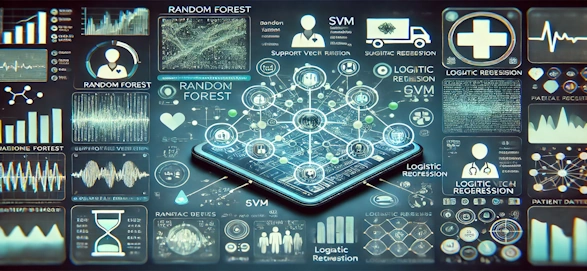

## **Introduction**
Cervical cancer is one of the leading causes of death among women worldwide. This study aims to train machine learning models that, using clinical data, can determine a patient's level of cancer risk. This includes classifying clinical data into risk levels such as "high," "medium," or "low," or simply "high" and "low."

## **Objectives**
1. Identify the most relevant risk factors mentioned in various studies.
2. Apply a classification based on a scoring system similar to the Swede scale to assign a score to each patient based on their clinical data.
3. Implement machine learning algorithms such as Random Forest, SVM, and logistic regression to make predictions based on clinical data and the identified risk factors.

## **Study Description**
This study begins with a state-of-the-art analysis and the collection of various investigations related to cervical cancer risk factors. Data from different medical studies, identifying risk factors associated with this disease, were analyzed.

Each collected dataset underwent a detailed analysis to determine the most predominant risk factors. Using this information, a CSV file was created representing each study, including the mentioned risk factors and their relevant statistical indicators such as *Odds Ratio (OR)*, confidence interval (*IC*), and *p-value*.

This dataset serves as the foundation for subsequent steps, which include data normalization, exploratory analysis, and the development of machine learning models for patient risk prediction and classification.


## Parte 1 | Estado del arte de los factores de riesgo

### **Importación de Librerías**

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import joblib

### **Carga y Visualización del Archivo CSV**

In [ ]:
# Configuración del archivo cargado
file_path = '/content/risk_factors_final.csv'  # Cambia esta ruta si subes el archivo con otro nombre


# Intentar cargar el archivo con una codificación alternativa
data = pd.read_csv(file_path, encoding='latin1')

# Mostrar las primeras filas para verificar la estructura del archivo
data.head()

,idArticulo,FactorRiesgo,OR (Odds Ratio),IC(Lower),IC(Upper),p (Valor P)
0,1,Antecedentes familiares de cáncer,8.16,3.15,14.81,1.0000
1,1,Tabaquismo,5.55,2.55,12.08,1.0000
2,1,Demográficos,3.50,1.63,7.50,1.0000
3,1,Relaciones sexuales,4.07,1.89,8.76,1.0000
4,1,Relaciones sexuales,1.39,0.64,3.06,0.4054


### Análisis exploratorio de datos

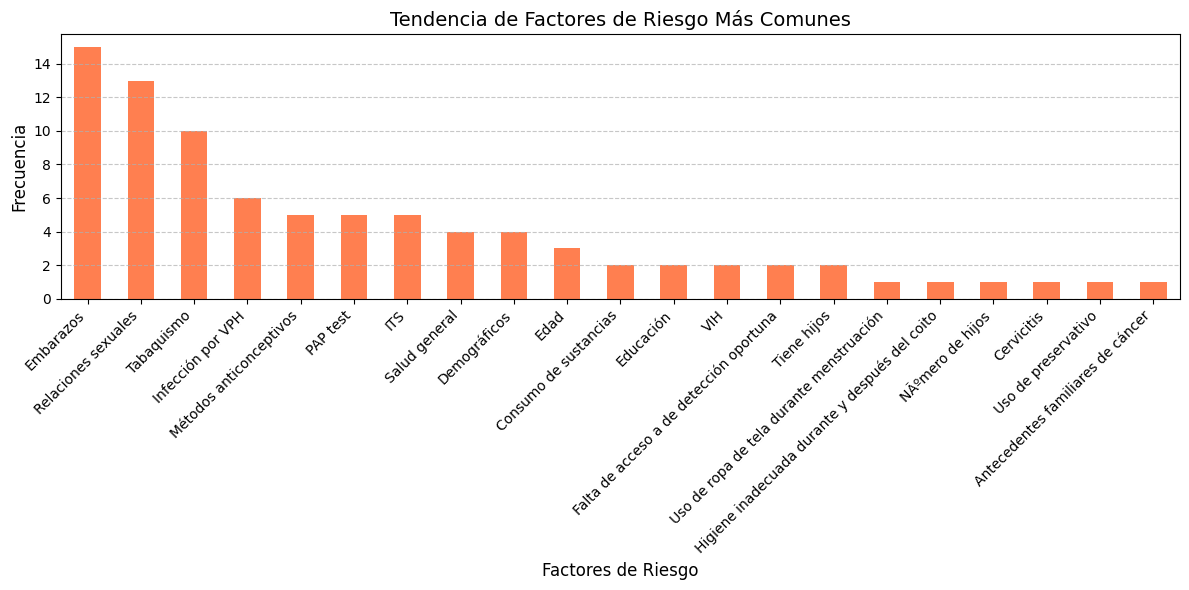

In [ ]:
# Contar la frecuencia de cada factor de riesgo
factor_counts = data['FactorRiesgo'].value_counts()

# Crear una gráfica de barras para los factores de riesgo más comunes
plt.figure(figsize=(12, 6))
factor_counts.plot(kind='bar', color='coral')

# Configurar etiquetas y título
plt.xlabel('Factores de Riesgo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.title('Tendencia de Factores de Riesgo Más Comunes', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [ ]:
# Diccionario de traducción de factores de riesgo
translation_dict = {
    'Embarazos': 'Pregnancies',
    'Relaciones sexuales': 'Sexual relationships',
    'Tabaquismo': 'Smoking',
    'Infección por VPH': 'HPV infection',
    'Métodos anticonceptivos': 'Contraceptive methods',
    'PAP test': 'Pap test',
    'ITS': 'STIs',
    'Salud general': 'General health',
    'Demográficos': 'Demographics',
    'Edad': 'Age',
    'Consumo de sustancias': 'Substance use',
    'Educación': 'Education',
    'VIH': 'HIV',
    'Falta de acceso a de detección oportuna': 'Lack of timely screening access',
    'Tiene hijos': 'Has children',
    'Uso de ropa de tela durante menstruación': 'Cloth use during menstruation',
    'Higiene inadecuada durante y después del coito': 'Poor hygiene during/after intercourse',
    'Número de hijos': 'Number of children',
    'Cervicitis': 'Cervicitis',
    'Uso de preservativo': 'Condom use',
    'Antecedentes familiares de cáncer': 'Family history of cancer'
}


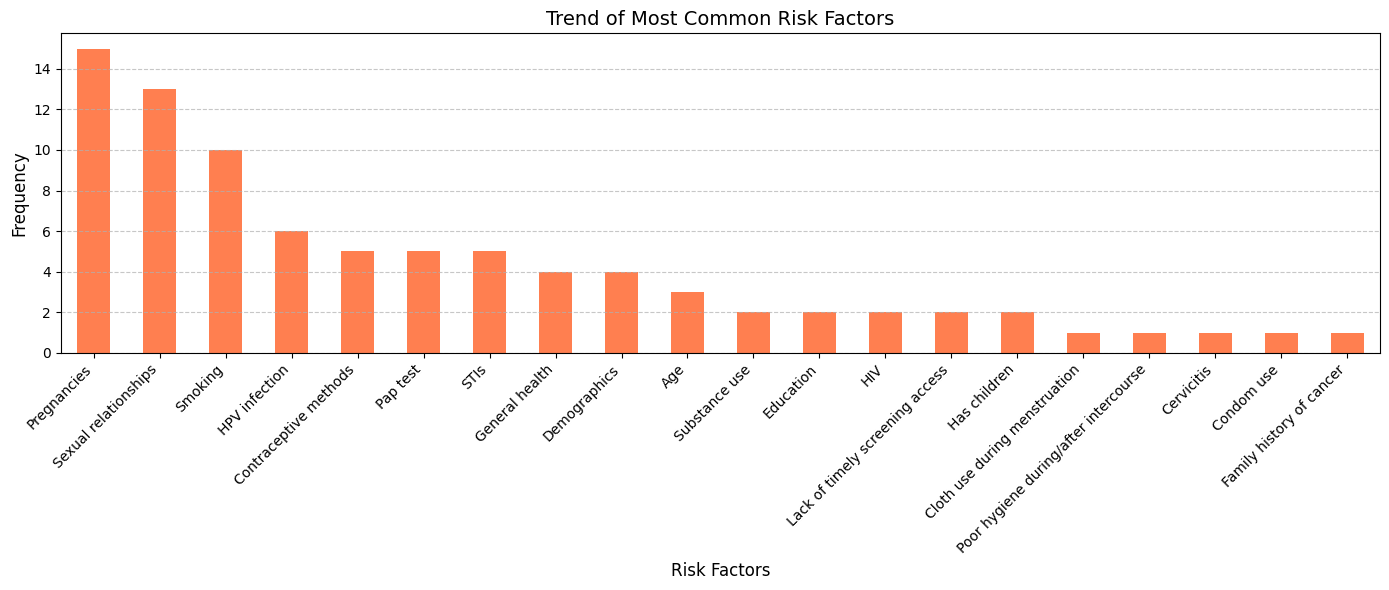

In [ ]:
# Traducir los factores de riesgo
data['FactorRiesgo_EN'] = data['FactorRiesgo'].map(translation_dict)

# Contar la frecuencia de cada factor de riesgo traducido
factor_counts_en = data['FactorRiesgo_EN'].value_counts()

# Crear una gráfica de barras en inglés
plt.figure(figsize=(14, 6))
factor_counts_en.plot(kind='bar', color='coral')

# Configurar etiquetas y título en inglés
plt.xlabel('Risk Factors', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Trend of Most Common Risk Factors', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()


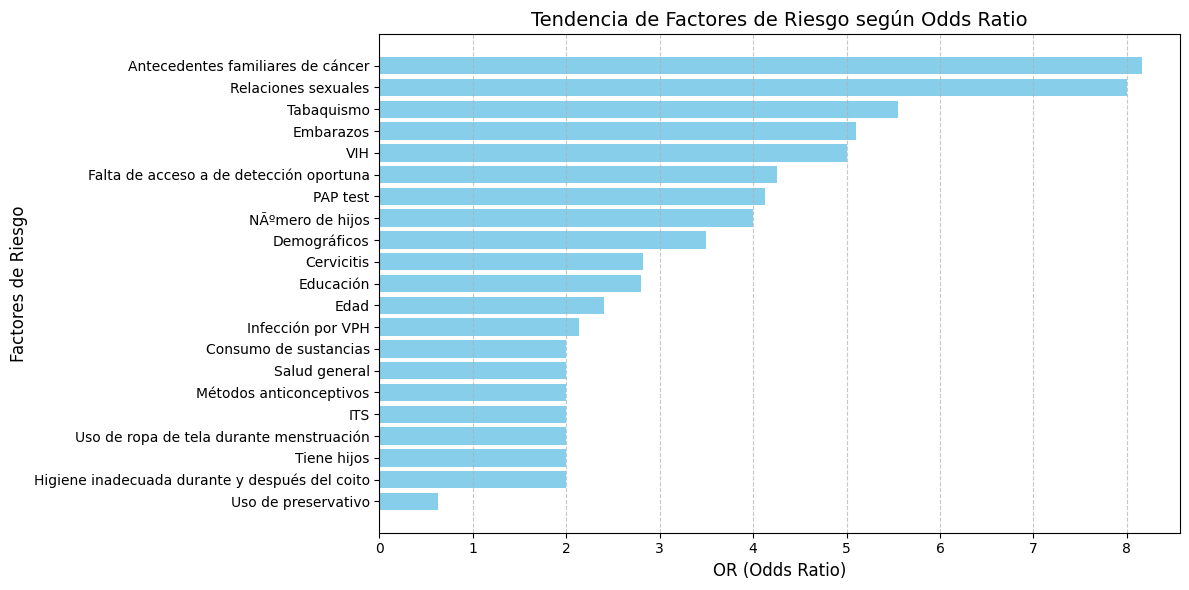

In [ ]:
# Ordenar los datos por Odds Ratio para mejor visualización
data_sorted = data.sort_values(by='OR (Odds Ratio)', ascending=False)

# Crear una gráfica de barras horizontales para visualizar las tendencias de los factores de riesgo
plt.figure(figsize=(12, 6))
plt.barh(data_sorted['FactorRiesgo'], data_sorted['OR (Odds Ratio)'], color='skyblue')
plt.xlabel('OR (Odds Ratio)', fontsize=12)
plt.ylabel('Factores de Riesgo', fontsize=12)
plt.title('Tendencia de Factores de Riesgo según Odds Ratio', fontsize=14)
plt.gca().invert_yaxis()  # Invertir el eje Y para mayor claridad
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

### Cálculo y Consolidación de Puntajes para Factores de Riesgo

In [ ]:
# Función para clasificar el riesgo basado en OR e IC
def clasificar_riesgo(row):
    if row['OR (Odds Ratio)'] > 2 and (row['IC(Lower)'] > 1 or row['IC(Upper)'] < 1):
        return 'Alto Riesgo'
    else:
        return 'Bajo Riesgo'

# Aplicar clasificación de riesgo
data['Clasificación Riesgo'] = data.apply(clasificar_riesgo, axis=1)

# Calcular puntaje ponderado basado en OR y diferencia entre IC Upper e IC Lower
data['Peso'] = data['IC(Upper)'] - data['IC(Lower)']
data['Puntaje Ponderado'] = data['OR (Odds Ratio)'] * data['Peso']

In [ ]:
# Consolidar puntajes para factores de riesgo únicos
factores_consolidados = data.groupby('FactorRiesgo').apply(
    lambda x: pd.Series({
        'Puntaje Consolidado': x['Puntaje Ponderado'].sum() / x['Peso'].sum() if x['Peso'].sum() > 0 else 0
    })
).reset_index()

# Ordenar por puntaje consolidado
factores_consolidados = factores_consolidados.sort_values(by='Puntaje Consolidado', ascending=False)

# Mostrar el resultado consolidado
factores_consolidados

<ipython-input-17-7864a011be7b>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  factores_consolidados = data.groupby('FactorRiesgo').apply(


,FactorRiesgo,Puntaje Consolidado
0,Antecedentes familiares de cáncer,8.160000
20,VIH,4.477108
12,NÃºmero de hijos,4.000000
7,Falta de acceso a de detección oportuna,3.925767
14,Relaciones sexuales,3.668204
16,Tabaquismo,3.156269
13,PAP test,2.877718
1,Cervicitis,2.820000
3,Demográficos,2.711228
6,Embarazos,2.693567


## Parte 2 | Incidencia de los factores de riesgo en los datos clínicos

### Carga y Visualización del Archivo CSV

In [ ]:
# Cargar el archivo CSV con las variables seleccionadas
file_path = '/content/SelectedVarV2.csv'  # Cambiar esta ruta por la correcta
datos_clinicos = pd.read_csv(file_path)


In [ ]:
# Crear un diccionario de umbrales basado en los puntajes consolidados
umbrales = dict(zip(factores_consolidados['FactorRiesgo'], factores_consolidados['Puntaje Consolidado']))

# Relacionar variables seleccionadas con factores de riesgo consolidados
columnas_asociadas = {
    "partos": "Número de hijos",
    "DetecccionOportuna": "Falta de acceso a detección oportuna",
    "NumParejaSexual": "Relaciones sexuales",
    "Tabaquismo": "Tabaquismo",
    "NumPap": "PAP test",
    "EdadinicioSex": "Cervicitis",
    "EstadoCivil": "Demográficos",
    "embarazos": "Embarazos",
    "NivelInstruccion": "Educación",
    "VacunaVPH": "Infección por VPH",
    "HistoriaCCV": "Salud general",
    "Anticonceptivos(DIU)": "Métodos anticonceptivos",
    "Edad": "Edad",
    "UltimoExamen": "ITS",
    "Tiene_hijos": "Tiene hijos",
}

In [ ]:
# Asegurarse de que las columnas numéricas tengan el tipo correcto
for columna in columnas_asociadas.keys():
    if columna in datos_clinicos.columns:
        # Convertir a numérico, ignorando errores (por si hay valores no convertibles)
        datos_clinicos[columna] = pd.to_numeric(datos_clinicos[columna], errors='coerce').fillna(0)

# Se basa en los umbrales calculados previamente para cada factor de riesgo
def calcular_umbral_paciente(row):
    puntaje = 0
    for columna, factor in columnas_asociadas.items():
        if columna in row:
            valor_variable = row[columna]
            if factor in umbrales:
                umbral = umbrales[factor]
                # Multiplicar el valor de la variable por el umbral correspondiente
                puntaje += valor_variable * umbral
    return round(puntaje, 3)

In [ ]:
# Aplicar la función de cálculo del umbral a cada fila
datos_clinicos['Puntaje Umbral'] = datos_clinicos.apply(calcular_umbral_paciente, axis=1)

# Dividir los puntajes en dos grupos: mitad inferior (0) y mitad superior (1)
umbral_medio = datos_clinicos['Puntaje Umbral'].median()



In [ ]:
def clasificar_riesgo(puntaje):
    return 1 if puntaje > umbral_medio else 0

datos_clinicos['Clasificación Riesgo'] = datos_clinicos['Puntaje Umbral'].apply(clasificar_riesgo)

# Mostrar una vista previa del dataset actualizado
print(datos_clinicos[['Puntaje Umbral', 'Clasificación Riesgo']].head())


   Puntaje Umbral  Clasificación Riesgo
0         243.498                     1
1         162.760                     0
2         224.118                     1
3         214.708                     1
4         142.388                     0


In [ ]:
# Guardar el dataset actualizado en un nuevo archivo CSV
#utput_path = '/content/Resultados_Clasificacion.csv'
#datos_clinicos.to_csv(output_path, index=False)

#print(f"Archivo actualizado guardado en {output_path}")

## Parte 3 | ML models for Risk Factors Pretdiction


### Definición de conjuntos y entrenamiento del modelo de Random Forest

In [ ]:
# Variables dependientes y predictoras
variable_dependiente = 'Clasificación Riesgo'
variables_predictoras = [
    'partos', 'DetecccionOportuna', 'NumParejaSexual', 'Tabaquismo', 'NumPap',
    'EdadinicioSex', 'EstadoCivil', 'embarazos', 'NivelInstruccion', 'VacunaVPH',
    'HistoriaCCV', 'Anticonceptivos(DIU)', 'Edad', 'UltimoExamen', 'Tiene_hijos'
]

In [ ]:
# Separar las variables predictoras (X) y dependiente (y)
X = datos_clinicos[variables_predictoras]
y = datos_clinicos[variable_dependiente]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear y entrenar el modelo Random Forest
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Guardar el modelo entrenado como un checkpoint
checkpoint_path = '/content/random_forest_model.pkl'
joblib.dump(modelo, checkpoint_path)
print(f"Modelo guardado en: {checkpoint_path}")

Modelo guardado en: /content/random_forest_model.pkl


In [ ]:
# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
# Imprimir las métricas
print("Resultados del modelo Random Forest:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Resultados del modelo Random Forest:
Accuracy: 0.958
Precision: 0.945
Recall: 0.974
F1 Score: 0.959

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       186
           1       0.94      0.97      0.96       194

    accuracy                           0.96       380
   macro avg       0.96      0.96      0.96       380
weighted avg       0.96      0.96      0.96       380



In [ ]:
# Guardar las predicciones en un nuevo archivo CSV
output_path = '/content/Resultados_Predicciones.csv'
data_test = X_test.copy()
data_test['Real'] = y_test
data_test['Prediccion'] = y_pred
data_test.to_csv(output_path, index=False)

print(f"Predicciones guardadas en {output_path}")


Predicciones guardadas en /content/Resultados_Predicciones.csv


### Prediccion de riesgo de cáncer de un paciente aleatorio

In [ ]:
#Carga del checkpoint del modelo entrenado
modelo_cargado = joblib.load(checkpoint_path)
# Generar un reporte clínico detallado para un paciente
sample_patient = X_test.sample(1)
patient_prediction = modelo.predict(sample_patient)[0]


In [ ]:
# Diccionario para traducir valores categóricos y describir variables
report_description = {
    'partos': lambda x: f"Número de hijos: {x}",
    'DetecccionOportuna': lambda x: "Tiene acceso a detección oportuna." if x == 1 else "No tiene acceso a detección oportuna.",
    'NumParejaSexual': lambda x: f"Número de parejas sexuales registradas: {x}",
    'Tabaquismo': lambda x: "Es fumador." if x == 1 else "No es fumador.",
    'NumPap': lambda x: f"Cantidad de pruebas Papanicolaou realizadas: {x}",
    'EdadinicioSex': lambda x: f"Edad de inicio de actividad sexual: {x} años.",
    'EstadoCivil': lambda x: {
        1: "Estado civil: Soltera.",
        2: "Estado civil: Casada.",
        3: "Estado civil: Divorciada.",
        4: "Estado civil: Separada.",
        5: "Estado civil: Unión libre.",
        6: "Estado civil: Viuda."
    }.get(x, "Estado civil desconocido."),
    'embarazos': lambda x: f"Número de embarazos: {x}",
    'NivelInstruccion': lambda x: {
        0: "Nivel de instrucción: Ninguna.",
        1: "Nivel de instrucción: Centro de alfabetización.",
        2: "Nivel de instrucción: Primaria.",
        3: "Nivel de instrucción: Secundaria.",
        4: "Nivel de instrucción: Superior.",
        5: "Nivel de instrucción: Postgrado."
    }.get(x, "Nivel de instrucción desconocido."),
    'VacunaVPH': lambda x: "Vacunado contra el VPH." if x == 1 else "No vacunado contra el VPH.",
    'HistoriaCCV': lambda x: "Tiene historial de cáncer cervical." if x == 1 else "No tiene historial de cáncer cervical.",
    'Anticonceptivos(DIU)': lambda x: "Usa anticonceptivos (DIU)." if x == 1 else "No usa anticonceptivos (DIU).",
    'Edad': lambda x: f"Edad actual: {x} años.",
    'UltimoExamen': lambda x: {
        0: "Nunca se ha realizado un examen.",
        1: "Se realizó un examen hace menos de 1 año.",
        2: "Se realizó un examen hace menos de 3 años.",
        3: "Se realizó un examen entre 3 y 5 años atrás.",
        4: "Se realizó un examen hace más de 5 años."
    }.get(x, "Tiempo desde el último examen desconocido."),
    'Tiene_hijos': lambda x: "Tiene hijos." if x == 1 else "No tiene hijos."
}


In [ ]:
print("\nReporte clínico detallado del paciente seleccionado:")
for col in sample_patient.columns:
    valor = sample_patient[col].values[0]
    if col in report_description:
        print(report_description[col](valor))

# Agregar la predicción al reporte como parte del mismo flujo
riesgo = "Riesgo alto de cáncer cervical." if patient_prediction == 1 else "Riesgo bajo de cáncer cervical."
print(f"\nPredicción del nivel de riesgo: {riesgo}")


Reporte clínico detallado del paciente seleccionado:
Número de hijos: 2
Tiene acceso a detección oportuna.
Número de parejas sexuales registradas: 1
No es fumador.
Cantidad de pruebas Papanicolaou realizadas: 4
Edad de inicio de actividad sexual: 23 años.
Estado civil: Casada.
Número de embarazos: 2
Nivel de instrucción: Primaria.
No vacunado contra el VPH.
No tiene historial de cáncer cervical.
No usa anticonceptivos (DIU).
Edad actual: 37 años.
Se realizó un examen hace menos de 1 año.
No tiene hijos.

Predicción del nivel de riesgo: Riesgo bajo de cáncer cervical.


### Predicción de riesgo de cáncer de los datos del conjunto de prueba

In [ ]:
# Generar predicciones para todo el conjunto de prueba con el modelo cargado
predicciones = modelo_cargado.predict(X_test)

# Crear un DataFrame con los resultados
resultados = X_test.copy()

resultados['Predicción'] = predicciones
resultados['Real'] = y_test.values

# Contar la frecuencia de las predicciones
frecuencias_prediccion = resultados['Predicción'].value_counts()

In [ ]:
resultados['Predicción'] = predicciones
resultados['Real'] = y_test.values

# Contar la frecuencia de las predicciones
frecuencias_prediccion = resultados['Predicción'].value_counts()

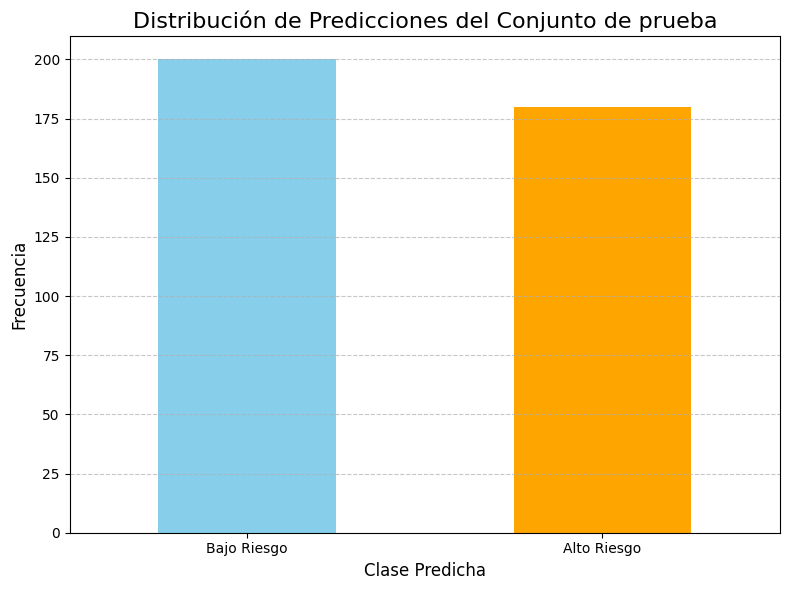

In [ ]:
# Crear un gráfico de barras para visualizar las predicciones
plt.figure(figsize=(8, 6))
frecuencias_prediccion.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribución de Predicciones del Conjunto de prueba', fontsize=16)
plt.xlabel('Clase Predicha', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Bajo Riesgo', 'Alto Riesgo'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


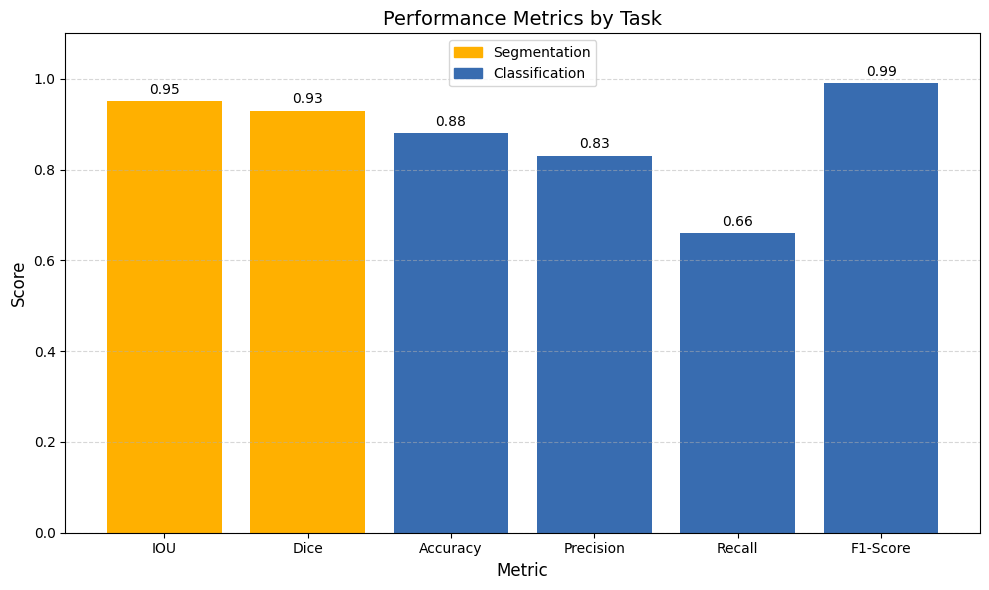

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos de la tabla
data = {
    'Task': ['Segmentation', 'Segmentation', 'Classification', 'Classification', 'Classification', 'Classification'],
    'Metric': ['IOU', 'Dice', 'Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Value': [0.95, 0.93, 0.88, 0.83, 0.66, 0.99]
}

df = pd.DataFrame(data)

# Crear el gráfico
plt.figure(figsize=(10, 6))
colors = ['#FFB000' if t == 'Segmentation' else '#386CB0' for t in df['Task']]
bars = plt.bar(df['Metric'], df['Value'], color=colors)

# Añadir etiquetas de valor
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

# Personalizar gráfico
plt.ylim(0, 1.1)
plt.title('Performance Metrics by Task', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Crear leyenda personalizada
import matplotlib.patches as mpatches
seg_patch = mpatches.Patch(color='#FFB000', label='Segmentation')
clas_patch = mpatches.Patch(color='#386CB0', label='Classification')
plt.legend(handles=[seg_patch, clas_patch])

plt.tight_layout()
plt.show()
